In [16]:
from olg import *
ranepa_colors = [(146/250,26/250,29/250)
,(230/250 , 43/250, 37/250)
,(231/250, 142/250, 36/250)
,(249/250, 155/250, 28/250)
, (242/250, 103/250, 36/250)]

In [17]:
olg_test = OLG_model()

In [18]:
models = {name:pickle.load(open(f'result/{name}.file', 'rb'))
          for name in ("baseline","baseline_c","private","reform","reform_delayed", "baseline_partial")}

In [19]:
models["baseline"] = models["baseline_c"]

In [20]:
models["baseline"]

In [21]:
base_part = models["baseline_partial"]

# Базовый сценарий

In [22]:
plt.rcParams.update({'font.size': 18})
plt.rc('legend',fontsize=18)

## Макро

In [51]:
t=range(5,150)
years = [2013+i for i in t]

In [52]:
# for name in ("baseline","private","reform","reform_delayed"):
#     for i in range(1,500):
#         models[name].update_government(i,1)
        

In [53]:
from matplotlib.lines import Line2D
legend_elements = [[Line2D([0], [0],linestyle="solid", color=ranepa_colors[0]
                          , lw=2, label=r'Базовый сценарий')],
                  [Line2D([0], [0],linestyle="dashed", color=ranepa_colors[2], alpha=0.4
                          , lw=2, label=r'$Изменение \tau_{VA}$')],
                  [Line2D([0], [0],linestyle="dashed", color=ranepa_colors[0], lw=2, label='Сценарий реформы')]]

In [54]:
model_base = models["baseline"]
(model_base.Rho_Outcome + model_base.Rho_lamp_sum-model_base.Rho_sum)

array([   6.57613215,    6.40872036,    6.70140171,    6.89532881,
          7.07668632,    7.42609867,    7.65923511,    7.92485753,
          8.28081035,    8.69967208,    9.1576502 ,    9.55331977,
          9.85458955,   10.11704933,   10.36984916,   10.60593674,
         10.82022596,   11.03840178,   11.27478027,   11.51741793,
         11.77774225,   12.02212997,   12.31170743,   12.60642491,
         12.87119502,   13.15137466,   13.35130578,   13.56833933,
         13.73554827,   13.90203979,   14.08413654,   14.19232014,
         14.26495885,   14.3070056 ,   14.2485502 ,   14.24871476,
         14.1666144 ,   14.09798664,   14.0284696 ,   13.94270659,
         13.85137943,   13.71345097,   13.63198541,   13.59288567,
         13.53285683,   13.45778602,   13.36763688,   13.39455683,
         13.42268597,   13.42479593,   13.44552753,   13.49266501,
         13.56809379,   13.64229089,   13.75606339,   13.90163023,
         14.05820745,   14.29918078,   14.58937216,   14.94018

/tmp/ipykernel_10604/3153853075.py:39: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(legend_elements_b,


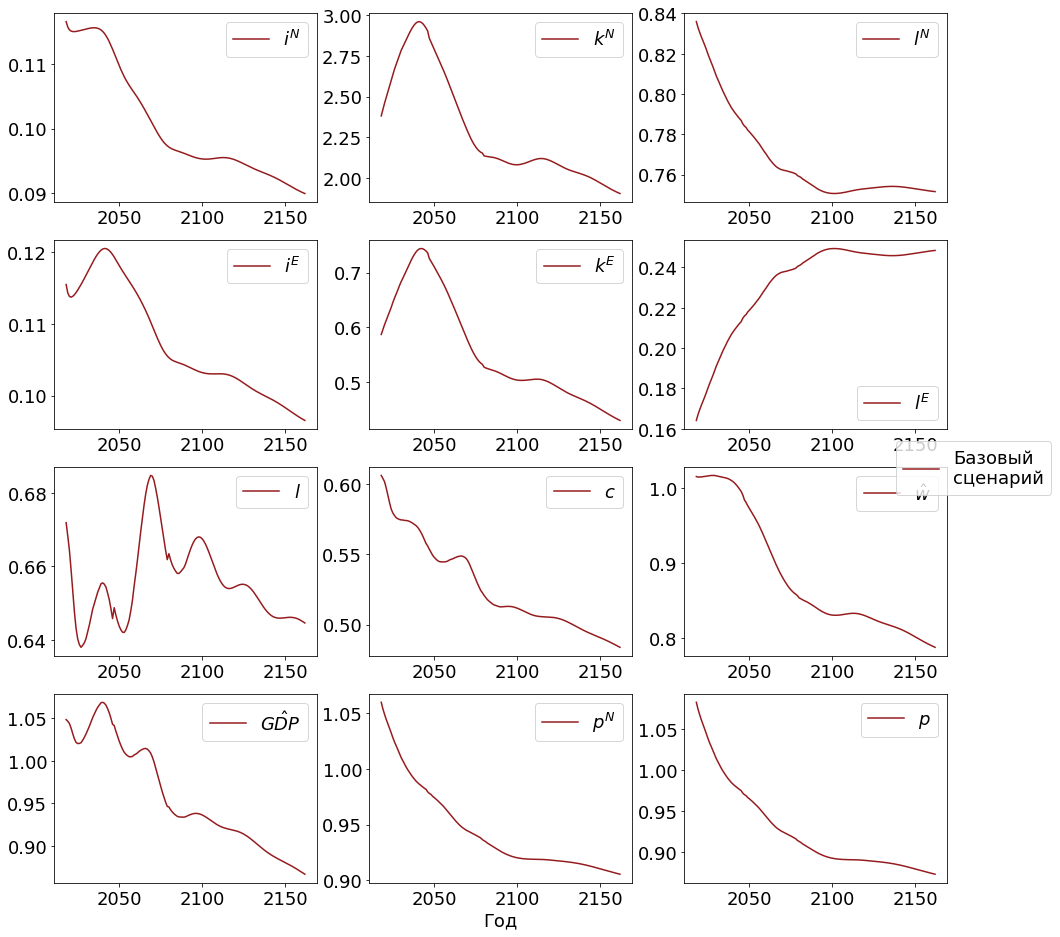

In [55]:
fig, ax = plt.subplots(4,3, figsize = (16,16))
legend_elements_b = [[Line2D([0], [0],linestyle="dashed", color=ranepa_colors[0]
                  , lw=2, label=r'Базовый\nсценарий')]
          ]
legend_labels_b = ['Базовый\nсценарий']
model_base = models["baseline"]


        
ax[0,0].plot(years,model_base.i[0,t], label = r'$i^N$' , linestyle='solid', color = ranepa_colors[0])
ax[1,0].plot(years,model_base.i[1,t], label = r'$i^E$', linestyle='solid', color = ranepa_colors[0])
ax[0,1].plot(years,model_base.k[0,t], label = r'$k^N$' , linestyle='solid', color = ranepa_colors[0])
ax[1,1].plot(years,model_base.k[1,t], label = r'$k^E$', linestyle='solid', color = ranepa_colors[0])
ax[0,2].plot(years,model_base.L_share[0,t], label = r'$l^N$' , linestyle='solid',
             color = ranepa_colors[0])
ax[1,2].plot(years,model_base.L_share[1,t], label = r'$l^E$', linestyle='solid',
             color = ranepa_colors[0])
c = model_base.Consumption/(model_base.N[:,:,:].sum(axis=(0,1))*model_base.A[0,:])
l = model_base.Labor/model_base.N[:,:,:].sum(axis=(0,1))
w_effective = model_base.w/model_base.A[0]
ax[2,2].plot(years,w_effective[t], label = r'$\hat{w}$' , linestyle='solid', color = ranepa_colors[0])
ax[2,0].plot(years,l[t], label = r'$l$' , linestyle='solid', color = ranepa_colors[0])
ax[2,1].plot(years,c[t], label = r'$c$' , linestyle='solid', color = ranepa_colors[0])

y = model_base.GDP/(model_base.N[:,:,:].sum(axis=(0,1))*model_base.A[0,:])
rho_deficit = (model_base.Rho_Outcome + model_base.Rho_lamp_sum-model_base.Rho_sum)/\
model_base.GDP
ax[3,0].plot(years,y[t], label = r'$\hat{GDP}$' ,
             linestyle='solid', color = ranepa_colors[0])
ax[3,1].plot(years,model_base.price_N[t], label = r'$p^N$' ,
             linestyle='solid', color = ranepa_colors[0])
ax[3,2].plot(years,model_base.price[t], label = r'$p$' ,
             linestyle='solid', color = ranepa_colors[0])

for row in ax:
    for col in row:
        col.legend()
ax[3,1].set_xlabel("Год")
fig.legend(legend_elements_b,
               labels=legend_labels_b,   # The labels for each line
               loc="center right",   # Position of legend
#                bbox_to_anchor=(0.5, 0., 0.5, 0.5),    # Small spacing around legend box
               title=""  # Title for the legend
               )
# plt.savefig("plots/baseline_steady_variables.pdf")

График государства

In [56]:
legend_elements_b_ext = [[Line2D([0], [0],linestyle="dashed", color=ranepa_colors[0]
                  , lw=2, label=r'Базовый\nсценарий')],
                         [Line2D([0], [0],linestyle="dashed", color=ranepa_colors[0]
                  , lw=2, label=r'Частичное равновесие')]
          ]
legend_labels_b_ext = ['Базовый\nсценарий', r'Частичное равновесие']

/tmp/ipykernel_10604/1038475325.py:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(legend_elements_b,


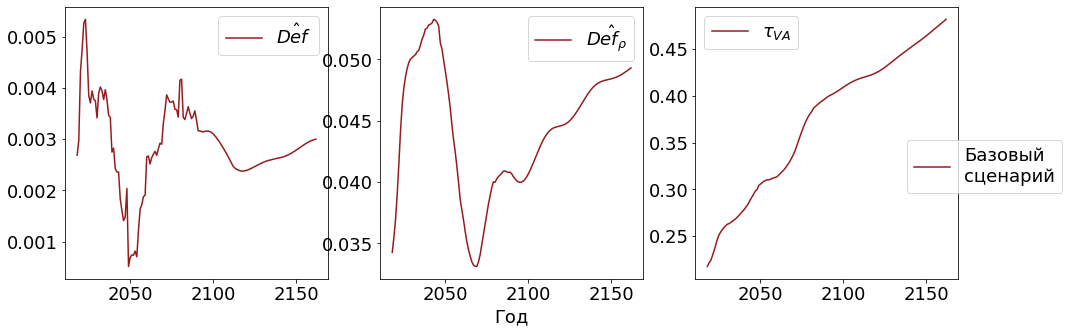

In [57]:
fig, ax = plt.subplots(1,3, figsize = (16,5))
ax[0].plot(years,models["baseline"].Deficit_to_GDP[t], label = r'$\hat{Def}$' ,
             linestyle='solid', color = ranepa_colors[0])
ax[1].plot(years,mod_base.Deficit_rho_to_GDP[t], label = r'$\hat{Def_\rho}$' ,
             linestyle='solid', color = ranepa_colors[0])
# ax[1].plot(years,models["baseline_partial"].Deficit_rho_to_GDP[t], label = r'$\hat{Def}$'+'\n(частичное\nравновесие)'  ,
#              linestyle='dashed', color = ranepa_colors[0])
ax[2].plot(years,models["baseline"].tau_VA[t], label = r'$\tau_{VA}$' ,
             linestyle='solid', color = ranepa_colors[0])
for row in ax:
    row.legend()
            
ax[1].set_xlabel("Год")
fig.legend(legend_elements_b,
               labels=legend_labels_b,   # The labels for each line
               loc="center right",   # Position of legend
#                bbox_to_anchor=(0.5, 0., 0.5, 0.5),    # Small spacing around legend box
               title=""  # Title for the legend
               )
plt.savefig("plots/baseline_gov.pdf")
# plt.figlegend( legend_elements[:-1], loc = 'lower center', ncol=5, labelspacing=0. )

Таблица

In [58]:
print_year = [2015+i*5 for i in range(17)]+[2100,2200]
mod = models["baseline"]
baseline_vars = (y,mod.k[0], mod.k[1],mod.i[0], mod.i[1],
                                         c,
                                         l,
                                         w_effective
                , mod.price
                , mod.price_N
                , mod.tau_VA
                 , 100*mod.Deficit_to_GDP
                , 100*mod.Deficit_rho_to_GDP)

names = (r"$\hat{GDP}$", r"$k^N$", r"$k^E$",r"$i^N$", r"$i^E$", r"$c$", r"$l$",r"$\hat{w}$"
         , r"$p$", r"$p^N$", r"$\tau_{VA}$", r"$\hat{Def}$", r"$\hat{Def_\rho}$")
df = pd.DataFrame([{name:var[year-2014] for name, var in zip(names,baseline_vars
                                        )}
 for year in print_year]
                 , index = print_year)

s = df.style
s.format({

   name: '{:.2f}' for name in names}, decimal=",")

with open(f"table/baseline.tex", 'w') as f:
    f.write(s.to_latex( hrules=True))

Таблица для сравнения

In [59]:
def get_relate(name, base, relate):
    if name in (r"$\tau_{VA}$",r"$\hat{Def}$", r"$\hat{Def_\rho}$"):
        return relate
    else:
        return 100*(relate-base)/base
names = (r"$\hat{GDP}$", r"$k^N$", r"$k^E$",r"$i^N$", r"$i^E$", r"$c$", r"$l$",r"$\hat{w}$"
         , r"$p$", r"$p^N$", r"$\tau_{VA}$", r"$\hat{Def}$", r"$\hat{Def_\rho}$")

for name in ("private", "reform", "reform_delayed"):

    mod = models[name]
#     for i in range(mod_ref.Rho_Outcome.shape[0]):
#         if mod_ref.Rho_Outcome[i]==0 and mod_ref.Rho_sum[i] == 0:
#             mod_ref.Rho_lamp_sum[i] = 0
#     rho_deficit_ref  = (mod.Rho_Outcome + mod.Rho_lamp_sum-mod.Rho_sum)/\
#     mod.GDP
    c_mod = mod.Consumption/(mod.N[:,:,:].sum(axis=(0,1))*mod.A[0,:])
    l_mod = mod.Labor/mod.N[:,:,:].sum(axis=(0,1))
    w_effective_mod = mod.w/mod.A[0]
    y_mod = mod.GDP/(mod.N[:,:,:].sum(axis=(0,1))*mod.A[0,:])
    relate_vars = (y_mod,mod.k[0], mod.k[1],mod.i[0], mod.i[1],
                                             c_mod,
                                             l_mod,
                                             w_effective_mod
                    , mod.price
                    , mod.price_N
                    , mod.tau_VA
                    , 100*mod.Deficit_to_GDP
                    , 100*mod.Deficit_rho_to_GDP)
    df = pd.DataFrame([{name:get_relate(name,
                        baseline_var,
                        relate_var )[year-2014] 
                        for name,
                        baseline_var,
                        relate_var in zip(names,baseline_vars,relate_vars
                                            )}
     for year in print_year[1:]]
                     , index = print_year[1:])
    
    s = df.style
    s.format({name: r'{:.2f}' for name in names}, decimal=",")
    with open(f"table/{name}.tex", 'w') as f:
        f.write(s.to_latex( hrules=True))

/tmp/ipykernel_10604/1738872097.py:22: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(legend_elements_b,


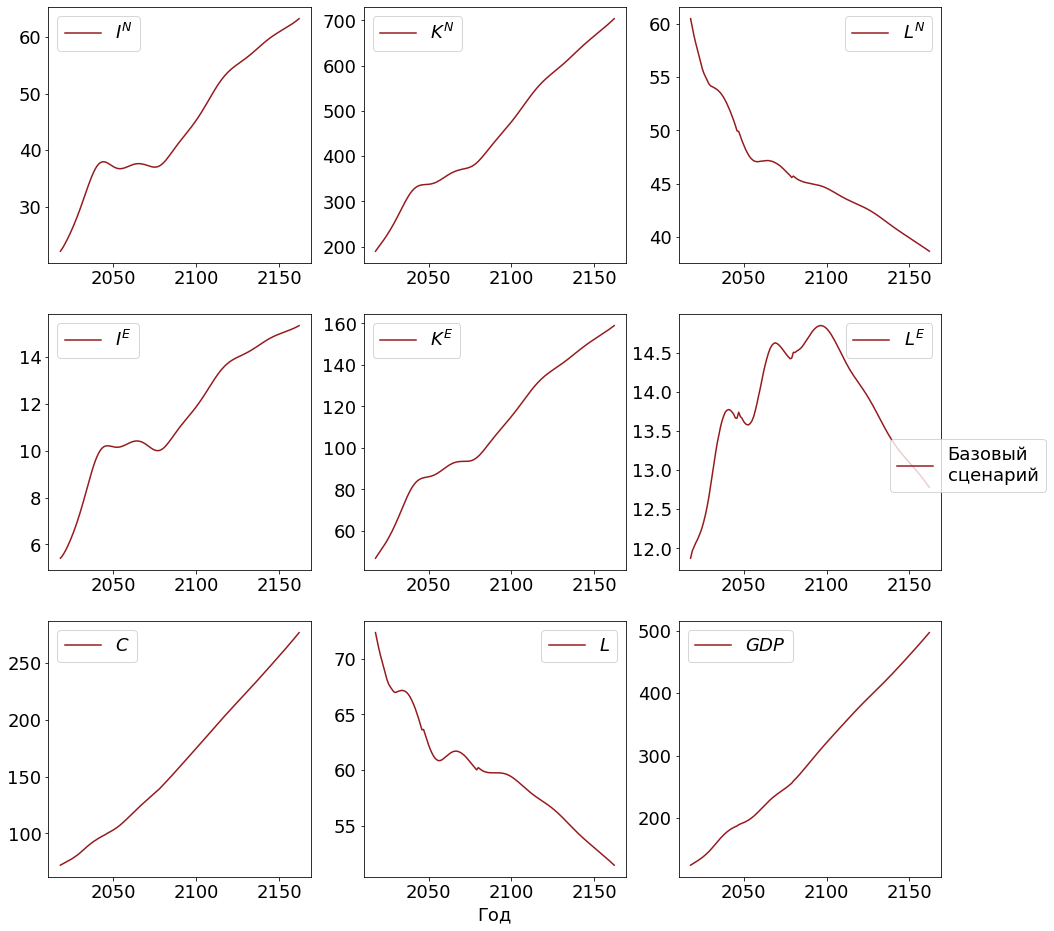

In [60]:
fig, ax = plt.subplots(3,3, figsize = (16,16))

ax[0,0].plot(years,models["baseline"].I[0,t], label = r'$I^N$' , linestyle='solid', color = ranepa_colors[0])
ax[1,0].plot(years,models["baseline"].I[1,t], label = r'$I^E$', linestyle='solid', color = ranepa_colors[0])
ax[0,1].plot(years,models["baseline"].K[0,t], label = r'$K^N$' , linestyle='solid', color = ranepa_colors[0])
ax[1,1].plot(years,models["baseline"].K[1,t], label = r'$K^E$', linestyle='solid', color = ranepa_colors[0])
ax[0,2].plot(years,models["baseline"].L[0,t], label = r'$L^N$' , linestyle='solid',
             color = ranepa_colors[0])
ax[1,2].plot(years,models["baseline"].L[1,t], label = r'$L^E$', linestyle='solid',
             color = ranepa_colors[0])

ax[2,0].plot(years,models["baseline"].Consumption[t], label = r'$C$' , linestyle='solid', color = ranepa_colors[0])
ax[2,1].plot(years,models["baseline"].Labor[t], label = r'$L$' , linestyle='solid', color = ranepa_colors[0])
ax[2,2].plot(years,models["baseline"].GDP[t], label = r'$GDP$' , linestyle='solid', color = ranepa_colors[0])


for row in ax:
    for col in row:
        col.legend()

ax[2,1].set_xlabel("Год")
fig.legend(legend_elements_b,
               labels=legend_labels_b,   # The labels for each line
               loc="center right",   # Position of legend
#                bbox_to_anchor=(0.5, 0., 0.5, 0.5),    # Small spacing around legend box
               title=""  # Title for the legend
               )
plt.savefig("plots/baseline_agg_variables.pdf")

# Микро

In [61]:
2013+30-80

1963

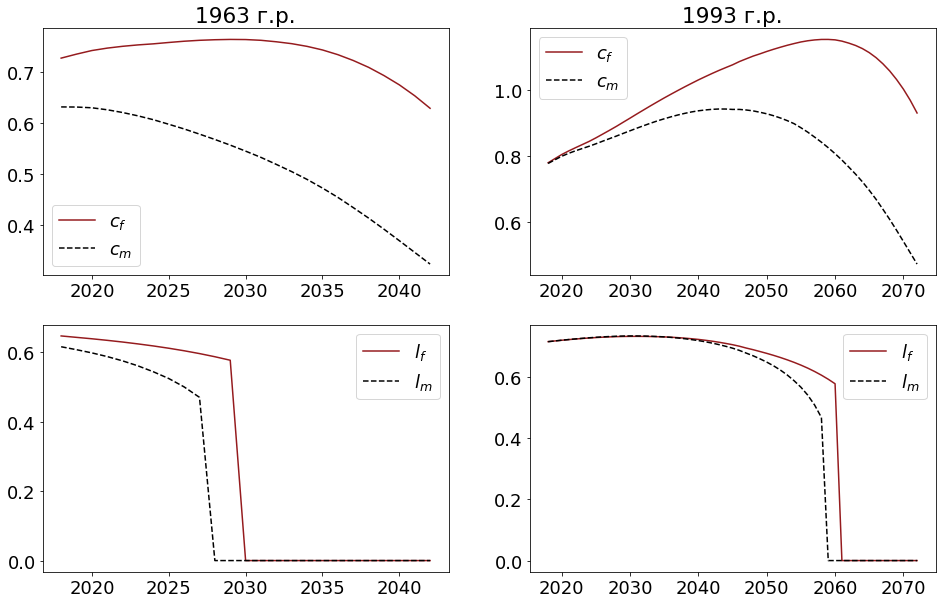

In [62]:
fig, ax = plt.subplots(2,2, figsize = (16,10))
g = 30
tm = range(5,g)
yearsm = [2013+i for i in tm]
ax[0,0].plot(yearsm,models["baseline"].c[0,g,tm], label = r'$с_{f}$'
             , linestyle='solid', color = ranepa_colors[0])
ax[1,0].plot(yearsm,models["baseline"].l[0,g,tm], label = r'$l_{f}$' 
             , linestyle='solid', color = ranepa_colors[0])

ax[0,0].plot(yearsm,models["baseline"].c[1,g,tm], label = r'$с_{m}$' 
             , linestyle='dashed', color = "black")
ax[1,0].plot(yearsm,models["baseline"].l[1,g,tm], label = r'$l_{m}$' 
             , linestyle='dashed', color = "black")

g = 60
tm = range(5,g)
yearsm = [2013+i for i in tm]
ax[0,1].plot(yearsm,models["baseline"].c[0,g,tm], label = r'$с_{f}$' 
             , linestyle='solid', color = ranepa_colors[0])
ax[1,1].plot(yearsm,models["baseline"].l[0,g,tm], label = r'$l_{f}$' 
             , linestyle='solid', color = ranepa_colors[0])

ax[0,1].plot(yearsm,models["baseline"].c[1,g,tm], label = r'$с_{m}$' 
             , linestyle='dashed', color = "black")
ax[1,1].plot(yearsm,models["baseline"].l[1,g,tm], label = r'$l_{m}$' 
             , linestyle='dashed', color = "black")
for row in ax:
    for col in row:
        col.legend()
ax[0,0].set_title("1963 г.р.")
ax[0,1].set_title("1993 г.р.")
#         for point in tau_VA_breaks:
#             col.axvline(x=point,ymin=0.05, ymax=0.95
#                         , c = ranepa_colors[1], alpha = 0.4
#                         , ls='--')
plt.savefig("plots/baseline_micro.pdf")

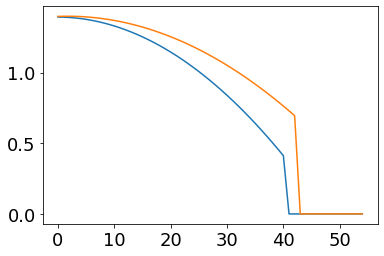

In [63]:
plt.plot(models["baseline"].epsilon[1,g,tm])
plt.plot(models["baseline"].epsilon[0,g,tm])

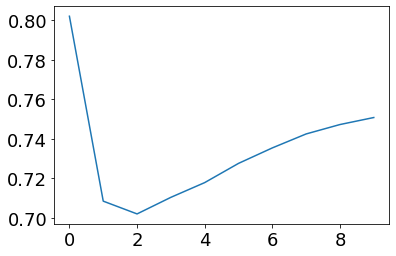

In [64]:
plt.plot(models["baseline"].c[0,30,:10])

In [65]:
for i in range(60):
    models["baseline"].update_household(i)

AttributeError: 'OLG_model' object has no attribute 'utility'

In [ ]:
# models["baseline"].epsilon[1,30,1:46]
models["baseline"].epsilon[1,30,1:15]=models["baseline"].epsilon[0,30,1:15]

# реформы

## Макро

In [ ]:

mod_base = models["baseline"]

for name in ("private", "reform", "reform_delayed"):
    fig, ax = plt.subplots(2,2, figsize = (15,10))
    mod_ref =  models[name]
    for i in range(5,50):
        mod_ref.update_household(i)
    g = 30
    tm = range(1,g)
    yearsm = [2013+i for i in tm]
    ax[0,0].plot(yearsm,(mod_ref.c[0,g,tm]-mod_base.c[0,g,tm]), label = r'$с_{f}$'
                 , linestyle='solid', color = ranepa_colors[0])
    ax[1,0].plot(yearsm,mod_ref.l[0,g,tm]-mod_base.l[0,g,tm], label = r'$l_{f}$' 
                 , linestyle='solid', color = ranepa_colors[0])

    ax[0,0].plot(yearsm,mod_ref.c[1,g,tm]-mod_base.c[1,g,tm], label = r'$с_{m}$'
                 , linestyle='dashed', color = "black")
    ax[1,0].plot(yearsm,mod_ref.l[1,g,tm]-mod_base.l[1,g,tm], label = r'$l_{m}$' 
                 , linestyle='dashed', color = "black")
    g = 60
    tm = range(1,g)
    yearsm = [2013+i for i in tm]
    
    ax[0,1].plot(yearsm,mod_ref.c[0,g,tm]-mod_base.c[0,g,tm], label = r'$с_{f}$'
                 , linestyle='solid', color = ranepa_colors[0])
    ax[1,1].plot(yearsm,mod_ref.l[0,g,tm]-mod_base.l[0,g,tm], label = r'$l_{f}$' 
                 , linestyle='solid', color = ranepa_colors[0])

    ax[0,1].plot(yearsm,mod_ref.c[1,g,tm]-mod_base.c[1,g,tm], label = r'$с_{m}$'
                 , linestyle='dashed', color = "black")
    ax[1,1].plot(yearsm,mod_ref.l[1,g,tm]-mod_base.l[1,g,tm], label = r'$l_{m}$' 
                 , linestyle='dashed', color = "black")
    ax[0,0].set_title("1963 г.р.")
    ax[0,1].set_title("1993 г.р.")
    for row in ax:
        for col in row:
            col.legend()
            
    plt.savefig(f"plots/{name}_micro.pdf")

# макро

In [ ]:


plt.rc('font', **font)
legend_elements = [[Line2D([0], [0],linestyle="dashed", color=ranepa_colors[0]
                  , lw=2, label=r'Базовый\nсценарий')],
           [Line2D([0], [0],linestyle="solid", color=ranepa_colors[0], lw=2, label=r'Сценарий\nреформы')]
          ]
legend_labels = ['Базовый\nсценарий', 'Реформа']
# mod_base = models["baseline"]

# for name in ("private", "reform", "reform_delayed"):
#     fig, ax = plt.subplots(4,3, figsize = (16,16))
#     mod_ref =  models[name]
#     c = (mod_ref.Consumption-mod_base.Consumption)/(mod_base.N[:,:,:].sum(axis=(0,1))*mod_base.A[0,:])
#     l = (mod_ref.Labor - mod_base.Labor)/mod_base.N[:,:,:].sum(axis=(0,1))
#     w_effective = (mod_ref.w- mod_base.w)/mod_base.A[0]
#     y = (mod_ref.GDP - mod_base.GDP)/(mod_base.N[:,:,:].sum(axis=(0,1))*mod_base.A[0,:])



#     ax[0,0].plot(years,mod_ref.i[0,t] - mod_base.i[0,t], label = r'$i^N$' , linestyle='solid', color = ranepa_colors[0])
#     ax[1,0].plot(years,mod_ref.i[1,t] - mod_base.i[1,t], label = r'$i^E$', linestyle='solid', color = ranepa_colors[0])
#     ax[0,1].plot(years,mod_ref.k[0,t] - mod_base.k[0,t], label = r'$k^N$' , linestyle='solid', color = ranepa_colors[0])
#     ax[1,1].plot(years,mod_ref.k[1,t] - mod_base.k[1,t], label = r'$k^E$', linestyle='solid', color = ranepa_colors[0])
#     ax[0,2].plot(years,mod_ref.L_share[0,t] - mod_base.L_share[0,t], label = r'$l^N$' , linestyle='solid',
#                  color = ranepa_colors[0])
#     ax[1,2].plot(years,mod_ref.L_share[1,t]- mod_base.L_share[1,t], label = r'$l^E$', linestyle='solid',
#                  color = ranepa_colors[0])



#     ax[2,2].plot(years,w_effective[t], label = r'$\hat{w}$' , linestyle='solid', color = ranepa_colors[0])
#     ax[2,0].plot(years,l[t], label = r'$l$' , linestyle='solid', color = ranepa_colors[0])
#     ax[2,1].plot(years,c[t], label = r'$c$' , linestyle='solid', color = ranepa_colors[0])



#     ax[3,0].plot(years,y[t], label = r'$\hat{GDP}$' ,
#                  linestyle='solid', color = ranepa_colors[0])
#     ax[3,1].plot(years,mod_ref.price_N[t]-mod_base.price_N[t], label = r'$p^N$' ,
#                  linestyle='solid', color = ranepa_colors[0])
#     ax[3,2].plot(years,mod_ref.price[t]-mod_base.price[t], label = r'$p$' ,
#                  linestyle='solid', color = ranepa_colors[0])

#     for row in ax:
#         for col in row:
#             col.legend()
#     ax[3,1].set_xlabel("Год")
#     plt.savefig(f"plots/{name}_steady_variables.pdf")

mod_base = models["baseline"]

for name in ("private", "reform", "reform_delayed"):
    
    fig, ax = plt.subplots(4,3, figsize = (16,16))
    mod_ref =  models[name]
            
    c_b = (mod_base.Consumption)/(mod_base.N[:,:,:].sum(axis=(0,1))*mod_base.A[0,:])
    l_b = (mod_base.Labor)/mod_base.N[:,:,:].sum(axis=(0,1))
    w_effective_b = (mod_base.w)/mod_base.A[0]
    y_b = (mod_base.GDP)/(mod_base.N[:,:,:].sum(axis=(0,1))*mod_base.A[0,:])
    
    c_r = (mod_ref.Consumption)/(mod_base.N[:,:,:].sum(axis=(0,1))*mod_base.A[0,:])
    l_r = (mod_ref.Labor)/mod_base.N[:,:,:].sum(axis=(0,1))
    w_effective_r = (mod_ref.w)/mod_base.A[0]
    y_r = (mod_ref.GDP)/(mod_base.N[:,:,:].sum(axis=(0,1))*mod_base.A[0,:])



    ax[0,0].plot(years,mod_base.i[0,t], linestyle='dashed', color = ranepa_colors[0])
    ax[1,0].plot(years, mod_base.i[1,t],  linestyle='dashed', color = ranepa_colors[0])
    ax[0,1].plot(years,mod_base.k[0,t],  linestyle='dashed', color = ranepa_colors[0])
    ax[1,1].plot(years,mod_base.k[1,t], linestyle='dashed', color = ranepa_colors[0])
    ax[0,2].plot(years, mod_base.L_share[0,t],  linestyle='dashed',
                 color = ranepa_colors[0])
    ax[1,2].plot(years,mod_base.L_share[1,t], linestyle='dashed',
                 color = ranepa_colors[0])
    
    ax[0,0].plot(years,mod_ref.i[0,t] ,label = r'$i^N$' ,   linestyle='solid', color = ranepa_colors[0])
    ax[1,0].plot(years,mod_ref.i[1,t], label = r'$i^E$',linestyle='solid', color = ranepa_colors[0])
    ax[0,1].plot(years,mod_ref.k[0,t] , label = r'$k^N$' , linestyle='solid', color = ranepa_colors[0])
    ax[1,1].plot(years,mod_ref.k[1,t] , label = r'$k^E$',  linestyle='solid', color = ranepa_colors[0])
    ax[0,2].plot(years,mod_ref.L_share[0,t] ,label = r'$l^N$' ,  linestyle='solid',
                 color = ranepa_colors[0])
    ax[1,2].plot(years,mod_ref.L_share[1,t],  label = r'$l^E$', linestyle='solid',
                 color = ranepa_colors[0])



    ax[2,2].plot(years,w_effective_b[t],  linestyle='dashed', color = ranepa_colors[0])
    ax[2,0].plot(years,l_b[t],linestyle='dashed', color = ranepa_colors[0])
    ax[2,1].plot(years,c_b[t],  linestyle='dashed', color = ranepa_colors[0])
    
    ax[2,2].plot(years,w_effective_r[t], label = r'$\hat{w}$' ,linestyle='solid', color = ranepa_colors[0])
    ax[2,0].plot(years,l_r[t],   label = r'$l$' , linestyle='solid', color = ranepa_colors[0])
    ax[2,1].plot(years,c_r[t], label = r'$c$' ,linestyle='solid', color = ranepa_colors[0])



    ax[3,0].plot(years,y_b[t],
                 linestyle='dashed', color = ranepa_colors[0])
    ax[3,1].plot(years,mod_base.price_N[t],
                 linestyle='dashed', color = ranepa_colors[0])
    ax[3,2].plot(years,mod_base.price[t], 
                 linestyle='dashed', color = ranepa_colors[0])

    ax[3,0].plot(years,y_r[t], label = r'$\hat{GDP}$' ,
                 linestyle='solid', color = ranepa_colors[0])
    ax[3,1].plot(years,mod_ref.price_N[t], label = r'$p^N$' ,
                 linestyle='solid', color = ranepa_colors[0])
    ax[3,2].plot(years,mod_ref.price[t],label = r'$p$' ,
                 linestyle='solid', color = ranepa_colors[0])

    for row in ax:
        for col in row:
            col.legend()
    ax[3,1].set_xlabel("Год")
    fig.legend(legend_elements,
           labels=legend_labels,   # The labels for each line
           loc="center right",   # Position of legend
#            bbox_to_anchor=(0.5, 0., 0.5, 0.5),    # Small spacing around legend box
           title=""  # Title for the legend
           )
    plt.savefig(f"plots/{name}_steady_variables.pdf")

In [ ]:
mod_base = models["baseline"]

for name in ("private", "reform", "reform_delayed"):
    fig, ax = plt.subplots(1,3, figsize = (16,5))
    mod_ref =  models[name]
    for _ in range(10):
    
        for i in range(5,70):
            mod_ref.tau_VA[i] = 0.5*(mod_ref.tau_VA[i-1]+mod_ref.tau_VA[i+1])

            
    rho_deficit_base = (mod_base.Rho_Outcome + mod_base.Rho_lamp_sum-mod_base.Rho_sum)/\
    mod_base.GDP
    for i in range(mod_ref.Rho_Outcome.shape[0]):
        if mod_ref.Rho_Outcome[i]==0 and mod_ref.Rho_sum[i] == 0:
            mod_ref.Rho_lamp_sum[i] = 0
            
    rho_deficit_ref  = (mod_ref.Rho_Outcome + mod_ref.Rho_lamp_sum-mod_ref.Rho_sum)/\
    mod_ref.GDP

    ax[0].plot(years,mod_base.Deficit_to_GDP[t],
                 linestyle='dashed', color = ranepa_colors[0])
    ax[1].plot(years,mod_base.Deficit_rho_to_GDP[t], 
                 linestyle='dashed', color = ranepa_colors[0])
    ax[2].plot(years,mod_base.tau_VA[t], 
                 linestyle='dashed', color = ranepa_colors[0])
    ax[0].plot(years,mod_ref.Deficit_to_GDP[t],
                 linestyle='solid',  label = r'$Def$' ,color = ranepa_colors[0])
    ax[1].plot(years,mod_ref.Deficit_rho_to_GDP[t],
                 linestyle='solid', label = r'$Def_\rho$' ,color = ranepa_colors[0])
    ax[2].plot(years,mod_ref.tau_VA[t],
                 linestyle='solid', label = r'$\tau_{VA}$' ,color = ranepa_colors[0])
    for row in ax:
        row.legend()
    ax[1].set_xlabel("Год")
#     ax[0].set_ylim([-0.01, 0.02])  

    fig.legend(legend_elements,
               labels=legend_labels,   # The labels for each line
               loc="center right",   # Position of legend
#                bbox_to_anchor=(0.5, 0., 0.5, 0.5),    # Small spacing around legend box
               title=""  # Title for the legend
               )
    plt.savefig(f"plots/{name}_gov.pdf")

In [ ]:
for _ in range(10):
    
    for i in range(5,70):
#         if np.sign(models["private"].tau_VA[i-1]-models["private"].tau_VA[i])==\
#         np.sign(models["private"].tau_VA[i+1]-models["private"].tau_VA[i]):
        models["private"].tau_VA[i] = 0.5*(models["private"].tau_VA[i-1]+models["private"].tau_VA[i+1])
#         models["private"].update_government(i,2)

In [ ]:
 models["private"].tau_VA[10:25]

In [ ]:
from olg import *
mod_base.rho#[5:] = rho_reform[5:]

Пожизненная полезность

In [ ]:
utility = {name:((model.c**(1-model.phi) * 
                             (1-model.l)**(model.phi)*model.Pi[:2,:610,:610]).sum(axis=2))
        for name,model in models.items()}
    
#     plt.plot(range(60,250),utility[0,60:250])

In [ ]:
res={name:z/utility["baseline"] for name, z in utility.items()}

In [ ]:
t_to_plot = range(100)
years_of_b = [1934+i for i in t_to_plot]

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (16,8))

for i in range(2):
    
    ax[i].plot(years_of_b, res["reform"][i,t_to_plot], label = "Немедленное повышение"
               , color = ranepa_colors[0])
    ax[i].plot(years_of_b, res["reform_delayed"][i,t_to_plot],
               label = "Отложенное повышение",  color = ranepa_colors[1], linestyle="dashed")
    ax[i].plot(years_of_b, res["private"][i,t_to_plot], label = "Приватизация",  color = "black")
    ax[i].set_title(["Женщины", "Мужчины"][i])
# ax[0].legend()
fig.supxlabel('Год рождения')

fig.legend(ax[0],
           labels=["Немедленное повышение", "Отложенное повышение", "Приватизация"],   # The labels for each line
           loc="center right",   # Position of legend
           bbox_to_anchor=(0.5, 0., 0.5, 0.5),    # Small spacing around legend box
           title=""  # Title for the legend
           )
plt.savefig(f"plots/utility.pdf")

Компенсирующая вариация
Пусть $c_1$ -  потребление в базовом сценарии, $l_1$ - труд в базовом сценарии, $c_2$ - потребление в альтернативном сценарии, $l_2$ - труд в альтеранативном сценарии. Тогда компенсирующая вариация
$$\Delta{c}= \frac{c_1^{1-\phi} (1-l_1)^\phi}{(1-l_2)^\phi} - c_2$$

In [ ]:
models

In [ ]:
name = 'private'
def compensation(name):
    return np.array([[[((models["baseline"].c[s,g,t]**(1-models["baseline"].phi) * 
    (1-models["baseline"].l[s,g,t])**(models["baseline"].phi)/
    (1-models[name].l[s,g,t])**(models["baseline"].phi))
                        **(1/(1-models["baseline"].phi))  - models[name].c[s,g,t])*\
       1/np.prod(1+models["baseline"].r[:t])*
       models["baseline"].N[s,g,t]
    for t in range(models["baseline"].c.shape[2])]
    for g in range(models["baseline"].c.shape[1])]
    for s in range(models["baseline"].c.shape[0])]).sum(axis=(0,1))

In [ ]:
res={name:compensation(name) for name, z in models.items()}

In [ ]:
res["reform"].sum(), res["reform_delayed"].sum(), res["private"].sum()

In [ ]:
t_to_plot = range(100)
years_of_b = [2014+i for i in t_to_plot]
# fig, ax = plt.subplots(1,2, figsize = (16,8))

plt.plot(years_of_b, -res["reform"][t_to_plot], label = "Немедленное повышение"
               , color = ranepa_colors[0])
plt.plot(years_of_b, -res["reform_delayed"][t_to_plot],
               label = "Отложенное повышение",  color = ranepa_colors[1], linestyle="dashed")
plt.plot(years_of_b, -res["private"][t_to_plot], label = "Приватизация",  color = "black")
# ax[0].legend()
plt.xlabel('Год')

plt.legend(
           labels=["Немедленное повышение", "Отложенное повышение", "Приватизация"],   # The labels for each line
           loc="center right",   # Position of legend
           bbox_to_anchor=(0.5, 0., 0.5, 0.5),    # Small spacing around legend box
           title=""  # Title for the legend
           )
# plt.yscale("log")
plt.savefig(f"plots/compensative_var.pdf")